In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from typing import List
from tqdm import tqdm

# New section

In [32]:
# for dirname, _, filenames in os.walk(('/kaggle/input')):
#   for filename in filenames:
#     print(os.path.join(dirname, filename))

# Loading and Preprocessing the dataset

In [33]:
train_df=pd.read_csv('~/Programming/COMP551/COMP551_A3/dataset/sign_mnist_train.csv')
test_df=pd.read_csv('~/Programming/COMP551/COMP551_A3/dataset/sign_mnist_test.csv')

In [34]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


The train_df dataset consit of 1st column representing labels 1 to 24. The label is loaded in a separate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [37]:
# Drop the label column for the train_df
train_label = train_df['label']
trainset = train_df.drop(['label'], axis=1)
# Convert the dataframe to numpy array
X_train = trainset.values.astype(np.float64)

# Same thing for the test_df
test_label = test_df['label']
testset = test_df.drop(['label'], axis=1)
# Convert the dataframe to numpy array
X_test = testset.values.astype(np.float64)

One-hot encodding

In [38]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

# Normalizatioin and Vectorization

In [39]:
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train, axis=0)
# For images, subtract a single data from all pixels
X_train -= X_train_mean
X_train /= X_train_std + 1e-5

X_test -= X_train_mean
X_test /= X_train_std + 1e-5

# Vectorization
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

2 hidden layers MLP

In [40]:
class NeuralNetlayer:
  def __init__(self):
    self.gradient = None
    self.parameters = None

  def forward(self, x):
    raise NotImplementedError

  def backward(self, gradient):
    raise NotImplementedError

In [41]:
class LinearLayer(NeuralNetlayer):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.ni = input_size
    self.no = output_size
    # For a layer with ReLU activation
    # He initialization
    std = np.sqrt(2. / input_size)
    self.w = np.random.randn(output_size, input_size) * std
    self.b = np.random.randn(output_size)
    self.cur_input = None
    self.parameters = [self.w, self.b]

  def forward(self, x):
    self.cur_input = x
    return x @ self.w.T + self.b

  def backward(self, gradient):
    assert self.cur_input is not None, "Must call forward before backward!"
    dw = gradient.T @ self.cur_input
    db = gradient.sum(axis=0)
    self.gradient = [dw, db]
    return gradient.dot(self.w)

In [42]:
class ReLULayer(NeuralNetlayer):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.gradient = np.where(x > 0, 1.0, 0.0)
        return np.maximum(0, x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
        return gradient * self.gradient

In [43]:
class SoftmaxOutputLayer(NeuralNetlayer):
    def __init__(self):
        super().__init__()
        self.cur_probs = None

    def forward(self, x):
        x_exp_shifted = x - np.max(x, axis=1, keepdims=True)  # Improve numerical stability
        exps = np.exp(x_exp_shifted)
        probs = exps / np.sum(exps, axis=-1, keepdims=True)
        self.cur_probs = probs
        return probs


    def backward(self, target):
        assert self.cur_probs is not None, "Must call forward before backward"
        return self.cur_probs - target

In [44]:
class MLP:
    def __init__(self, *args: List[NeuralNetlayer]):
        self.layers = args

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, target):
        for layer in self.layers[::-1]:
            target = layer.backward(target)

    def predict(self, x):
        return self.forward(x)
    
    def fit(self, x, y, optimizer, epochs, lr):
        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = -np.sum(y * np.log(y_pred)) / len(y)
            print(f"Epoch {epoch+1}/{epochs} Loss: {loss}")
            self.backward(y)
            optimizer.step()

In [45]:
class Optimizer:
    def __init__(self, net: MLP):
        self.net = net

    def step(self):
        for layer in self.net.layers[::-1]:
            if layer.parameters is not None:
                self.update(layer.parameters, layer.gradient)

    def update(self, params, gradient):
        raise NotImplementedError

class GradientDescentOptimizer(Optimizer):
    def __init__(self, net: MLP, lr: float, lamda: float = 0.0, clip_value: float = None):
        super().__init__(net)
        self.lr = lr
        self.lamda = lamda
        self.clip_value = clip_value  # Clip value threshold

    def clip_gradient(self, gradient):
        """Clip the gradients to the specified range [-clip_value, clip_value]."""
        if self.clip_value is not None:
            np.clip(gradient, -self.clip_value, self.clip_value, out=gradient)
        return gradient

    def update(self, params, gradients):
        w, b = params
        dw, db = gradients

        # Clip gradients if clip_value is specified
        dw_clipped = self.clip_gradient(dw)
        db_clipped = self.clip_gradient(db)

        # Apply updates with potentially clipped gradients
        w -= self.lr * (dw_clipped + self.lamda * w)
        b -= self.lr * db_clipped

In [46]:
def train(mlp: MLP, optimizer: Optimizer, data_x, data_y, steps):
    losses = []
    labels = data_y
    for _ in tqdm(range(steps)):
        predictions = mlp.forward(data_x)
        loss = -(labels * np.log(predictions)).sum(axis=-1).mean()
        losses.append(loss)
        mlp.backward(labels)
        optimizer.step()
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Cross entropy loss")

In [47]:
def train_sgd(mlp, optimizer, X_train, y_train, epochs):
    for epoch in range(epochs):
        # Shuffle the training data
        perm = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[perm]
        y_train_shuffled = y_train[perm]
        
        for i in range(X_train.shape[0]):
            # Select a single training example
            X_mini = X_train_shuffled[i:i+1]
            y_mini = y_train_shuffled[i:i+1]
            
            # Perform a forward pass and compute the loss
            predictions = mlp.forward(X_mini)
            loss = -(y_mini * np.log(predictions)).sum()  # Example for cross-entropy loss
            
            # Backward pass to compute gradients
            mlp.backward(y_mini)
            
            # Update model parameters
            optimizer.step()

        # Optionally print the loss here to monitor training progress
        print(f"Epoch {epoch+1}, Loss: {loss}")

In [48]:
def evaluate_acc(mlp: MLP, data_x, data_y):
    predictions = mlp.forward(data_x)
    return np.mean(np.argmax(predictions, axis=-1) == np.argmax(data_y, axis=-1))

100%|██████████| 200/200 [00:53<00:00,  3.71it/s]


Training accuracy:  0.7124930284439487


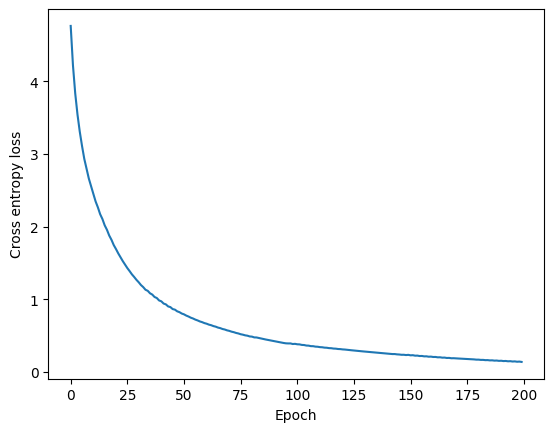

In [49]:
n_features = X_train.shape[-1]
HIDDEN_SIZE = 64
OUTPUT_SIZE = 24
GRADIENT_STEPS = 200

mlp2 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE, OUTPUT_SIZE),
    SoftmaxOutputLayer()
)
opt2 = GradientDescentOptimizer(mlp2, 1e-3, lamda=1e-1, clip_value=1.0)

train(mlp2, opt2, X_train, y_train, GRADIENT_STEPS)
# mlp2.fit(X_train, y_train, opt2, GRADIENT_STEPS, 1e-3)
print("Training accuracy: ", evaluate_acc(mlp2, X_test, y_test))

In [50]:
print("Test accuracy:", evaluate_acc(mlp2, X_test, y_test))

Test accuracy: 0.7124930284439487
